# Train a regressor model and test its performance

In [7]:
import Astraea
import pandas as pd
import numpy as np

### Generate random training/testing set

In [3]:
# create random feature matrix with 20 features and 5000 total data points
X=np.random.rand(5000,20)

# create labels from features
y=sum([X[:,i]*np.random.rand(1) for i in range(np.shape(X)[1])])

# put features and labels into one pandas dataFrame
X_y=pd.DataFrame(np.hstack((X,np.reshape(y,(5000,1)))),columns=np.append(['X'+str(i) for i in range(np.shape(X)[1])],['y']))

# assign random errors
X_y['y_err']=np.random.rand(5000)

X_y

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X12,X13,X14,X15,X16,X17,X18,X19,y,y_err
0,0.629528,0.293552,0.097964,0.328440,0.381706,0.177339,0.910299,0.380214,0.412816,0.735869,...,0.465119,0.528047,0.189382,0.450665,0.334259,0.336122,0.796674,0.460294,3.824989,0.513084
1,0.737551,0.250513,0.798310,0.796390,0.678735,0.992394,0.856792,0.739566,0.312909,0.842701,...,0.517700,0.727887,0.688739,0.578027,0.949572,0.154475,0.624710,0.140975,5.371995,0.921432
2,0.891088,0.142762,0.829404,0.475974,0.571662,0.595074,0.326667,0.154662,0.483666,0.562231,...,0.192030,0.101358,0.986223,0.459177,0.284851,0.703521,0.471639,0.182225,4.189491,0.905173
3,0.062007,0.929447,0.191230,0.826545,0.095250,0.392463,0.773461,0.440586,0.580377,0.347109,...,0.625699,0.045030,0.139719,0.410680,0.753726,0.132753,0.726482,0.376932,3.581798,0.441817
4,0.940232,0.985968,0.166498,0.159516,0.524388,0.281703,0.485311,0.183316,0.579191,0.127937,...,0.143793,0.290542,0.814814,0.195148,0.077841,0.547181,0.779990,0.929068,4.219916,0.998539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.651511,0.740099,0.229277,0.008586,0.461303,0.951044,0.529136,0.636860,0.341044,0.611138,...,0.391620,0.794452,0.359856,0.712438,0.587323,0.738279,0.748222,0.365885,4.618467,0.240135
4996,0.812508,0.810099,0.357231,0.550673,0.898973,0.502852,0.296709,0.199195,0.241025,0.418955,...,0.669509,0.261097,0.749121,0.075272,0.872682,0.160504,0.442376,0.472185,4.518084,0.427904
4997,0.099673,0.720465,0.657538,0.556381,0.755781,0.166516,0.015130,0.592027,0.489250,0.443780,...,0.726216,0.678694,0.073100,0.873511,0.229303,0.381212,0.966683,0.807717,4.152989,0.485571
4998,0.497771,0.442845,0.252951,0.022521,0.959337,0.277848,0.546809,0.629213,0.606385,0.669288,...,0.883761,0.117689,0.227091,0.583599,0.026480,0.642153,0.208570,0.928255,4.069785,0.460290


### Train regressor model with 3 estimators to minimize varience

In [5]:
# train the model with default settings
regr,regr_outs=Astraea.RFregressor(X_y,['X'+str(i) for i in range(np.shape(X)[1])],target_var='y',target_var_err='y_err',n_estimators=3)


Simpliest example:
 regr,importance,actrualF,ID_train,ID_test,predictp,ave_chi,MRE_val,X_test,y_test,X_train,y_train = RFregressor(df,testF)

Fraction of data used to train: 0.8
# of Features attempt to train: 20
Features attempt to train: ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19']
ID column not found, using index as ID!
5000 stars in dataframe!
5000 total stars used for RF!
4000 training stars!
Finished training! Making predictions!
Finished predicting! Calculating statistics!
Median Relative Error is: 0.0586360127317935
Average chi^2 is: 2.6572820766606253
Finished!


### Output discription see https://astraea.readthedocs.io/en/latest/user/api.html

In [6]:
regr_outs

importance    [0.13620822218805653, 0.04980837059013859, 0.1...
actrualF      [X0, X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, ...
ID_train      [3622, 3830, 1651, 4641, 4945, 1275, 3602, 402...
ID_test       [29, 31, 34, 41, 45, 46, 48, 60, 61, 65, 72, 7...
prediction    [3.7957294983814625, 3.6619623122920664, 4.286...
ave_chi2                                                2.65728
MRE                                                    0.058636
X_test        [[0.5907463668643641, 0.6024894277939207, 0.14...
y_test        [3.5846192221412707, 3.5406493521883124, 4.583...
X_train       [[0.20046650144988898, 0.7542164278336723, 0.7...
y_train       [4.192707678701057, 3.909233828301588, 4.17088...
dtype: object

### Plot importance and Predicted vs True

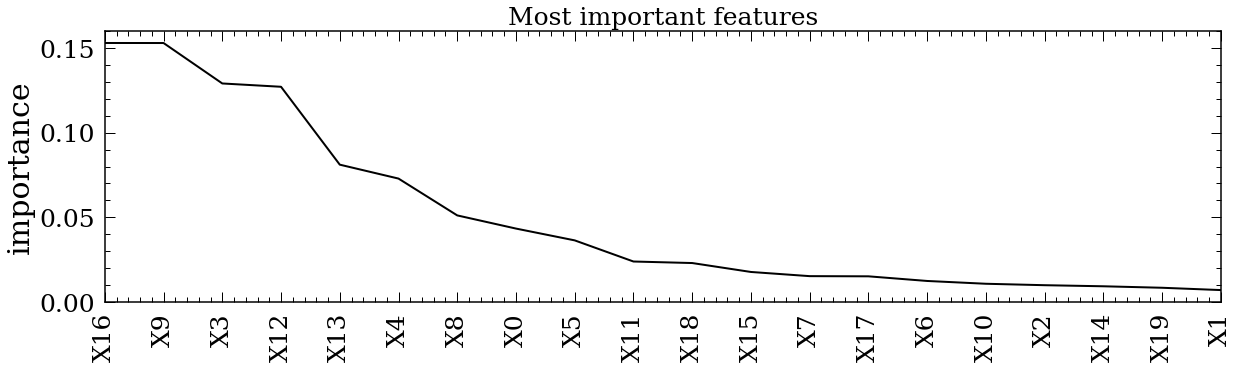

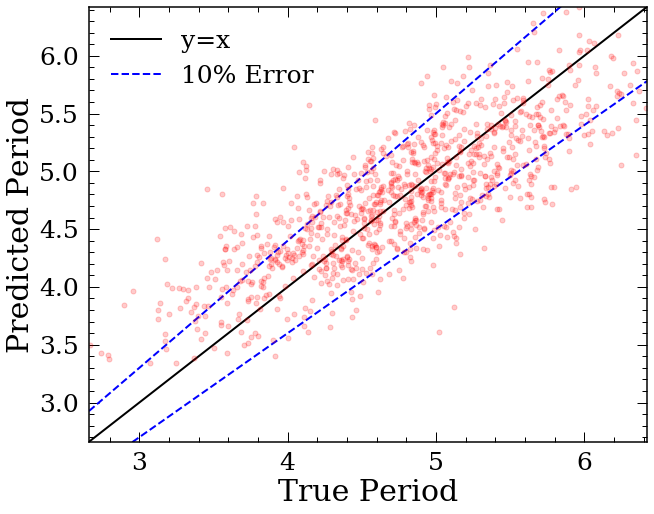

In [9]:
# plot cross-validation result 
Astraea.plot_result(regr_outs['actrualF'],regr_outs['importance'],regr_outs['prediction'],regr_outs['y_test'],labelName='y',MS=10)
